In this kernel we will see how to do Feature Selection.We will be using Lasso,Ridge and Embeded technique.Regularization means adding penalty to the parameters of the machine learning model.THis helps in reducing the freedom of the model.Lasso regression has the ability to shrink the coefficinets to zero.This helps in carrying out feature selection.This Kernel is a work in process and I will be updating the kernel in coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bnp-paribas-cardif-claims-management/sample_submission.csv.zip
/kaggle/input/bnp-paribas-cardif-claims-management/test.csv.zip
/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip
/kaggle/input/paribas-claim-feature-selection/train.csv


**Importing the Python Modules**

In [2]:
df = pd.read_csv('../input/paribas-claim-feature-selection/train.csv',nrows=50000)
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

We have imported only 50000 rows of data and we can see that there are 133 feature in our dataset.Out task in to used feature selection and to reduce the number of feature needed by our machine learning model to predic the outcome.

In [4]:
# Creating a copy of the data 
df_copy = df.copy()
df.shape

(50000, 133)

In [5]:
# In practise feature selection should be done after pre processing the data categorical data should be encoded and then only we need to access how deterministic they are of the target
# Here we will be considering Numerical Variables 
# Selecting the numerical columns with the below lines of code 

numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(df.select_dtypes(include = numerics).columns)
df = df[numerical_vars]
df.shape

(50000, 114)

So intially we had 133 features after removing the categorically data we have only 114 numerical data.

Pandas Profiling to get Stats

### 1.Lasso Regularization

**Test Train Split**

It is a good practise to do feature selection only on the training dataset.

In [6]:
# seperate train and test sets 
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=['target','ID'],axis=1),df['target'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((35000, 112), (15000, 112))

**Feature Scaling**

In [7]:
# Linear Model Benifits with feature Scaling

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# We will be doing model fitting and feature selection together 
# We will specify Logistic regression and select Lasso (L1) penalty 
# SelectFromModel from sklearn will be used to slect the features for which coefficients are non-zero

#sel_ = SelectFromModel(LogisticRegression(C=1, penalty= 'l1'))

sel_ = SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# I used penalty as none as l1 option was not working

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [9]:
# this command lets us to vizualise which features were kept
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False])

In [10]:
# We can now make a list of selected features 
selected_feat = X_train.columns[(sel_.get_support())]

print('Total features:{}'.format((X_train.shape[1])))
print('Selected features:{}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero:{}'.format(np.sum(sel_.estimator_.coef_==0)))

Total features:112
Selected features:9
Features with coefficients shrank to zero:103


By Changing the Value of alpha we can change the number of selected features.Hence we can try some iteration to arrive at optimum value of number of selected features

In [11]:
# The number of features which coefficient was shrank to zero 
np.sum(sel_.estimator_.coef_==0)

103

In [12]:
# Identifying the removed features 
removed_feats =X_train.columns[(sel_.estimator_.coef_==0).ravel().tolist()]
removed_feats


Index(['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       ...
       'v120', 'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v130',
       'v131'],
      dtype='object', length=103)

In [13]:
selected_feat

Index(['v14', 'v34', 'v38', 'v40', 'v45', 'v50', 'v51', 'v119', 'v129'], dtype='object')

In [14]:
df.shape

(50000, 114)

In [15]:
# We can now remove the features from training and test set 
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape,X_test_selected.shape

((35000, 9), (15000, 9))

**Logistic Regression**

In [16]:
"""from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_selected,y_train)"""
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train_selected,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Making the Prediction **

In [17]:
#y_test=lm.predict(X_test_selected)
y_pred=classifier.predict(X_test_selected)
print(y_test)

11841    1
19602    1
45519    1
25747    1
42642    1
        ..
38344    1
49984    1
32624    1
46437    1
35070    1
Name: target, Length: 15000, dtype: int64


### Model Performance

**A].Accuracy**

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [19]:
print('Accuracy of model is:',accuracy_score(y_test,y_pred))

Accuracy of model is: 0.7654666666666666


**B].Confusion Matrix**

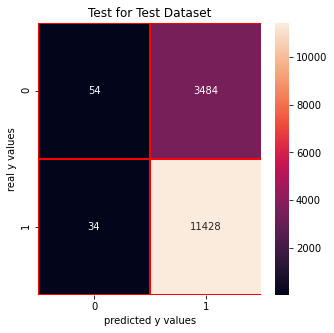

In [20]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

**C].Classification Report **

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.02      0.03      3538
           1       0.77      1.00      0.87     11462

    accuracy                           0.77     15000
   macro avg       0.69      0.51      0.45     15000
weighted avg       0.73      0.77      0.67     15000



### 2.Ridge Regularization 

L2 regularization doesnt sink the coefficients to Zero

In [22]:
df1=df_copy
df1.shape

(50000, 133)

**Getting only Numerical Variables**

In [23]:
# In practise feature selection should be done after pre processing the data categorical data should be encoded and then only we need to access how deterministic they are of the target
# Here we will be considering Numerical Variables 
# Selecting the numerical columns with the below lines of code 

numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(df1.select_dtypes(include = numerics).columns)
df1 = df1[numerical_vars]
df1.shape

(50000, 114)

In [24]:
df.shape

(50000, 114)

From 133 the number of variables has gone done to 114 as we are considering only Numerical Variables.

**Test Train Split**

In [25]:
# seperate train and test sets 
X_train,X_test,y_train,y_test = train_test_split(df1.drop(labels=['target','ID'],axis=1),df1['target'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((35000, 112), (15000, 112))

In [26]:
# Linear Model Benifits with feature Scaling

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Logistic Regression with Selection Algorithm**

In [27]:
sel_ = SelectFromModel(LogisticRegression(C=1000,penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [28]:
# We will be doing model fitting and feature selection together 
# We will specify Logistic regression and select Lasso (L1) penalty 
# SelectFromModel from sklearn will be used to slect the features for which coefficients are non-zero

#sel_ = SelectFromModel(LogisticRegression(C=1, penalty= 'l1'))

sel_ = SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# I used penalty as none as l1 option was not working

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [29]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False])

The features with False have been removed by the feature selection algorithm.Here the coefficents are selected based on the mean value of the coefficients.The features with coefficent values higer than the mean values are retained.

In [30]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

9

So out of 112 we have finally ended up with 60 features based on Mean value of the coefficients

In [31]:
np.sum(sel_.estimator_.coef_==0)

103

In [32]:
sel_.estimator_.coef_.mean()

0.0012729478131459436

So we can see that Ridge Reglarization doesnt make the coefficient of the features to Zero.We have done features based on the mean value of the coefficients.The features having mean coefficent value more than 0.00889 will be selected.

**Distribution of Coefficients**

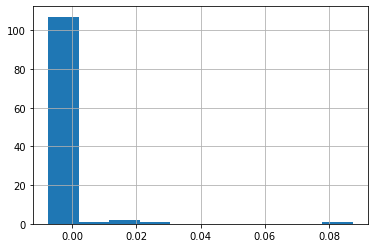

In [33]:
pd.Series(sel_.estimator_.coef_.ravel()).hist();

So the distribution shows that we have positive and negative values of the coefficints.They show that some fatures have positive and some have negative correlation with the Target.

The absolute value of the coefficients give an idea about the importance of the feature.So Feature selection will be don by filtering on the absolute value of the oefficients. 

In [34]:
np.abs(sel_.estimator_.coef_).mean()

0.0015488620346965304

**Plotting the historgram with the absoulte value of the coefficient **

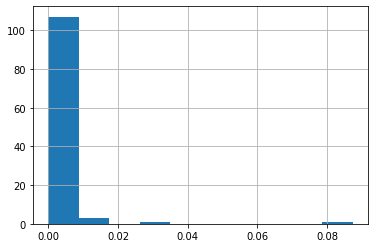

In [35]:
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist();

In [36]:
# Comparing the number of selected features with the coefficients who have value above the mean of thw absoulte value of the coefficents
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients greater than the mean coefficient:{}'.format(np.sum(np.abs(sel_.estimator_.coef_)>np.abs(sel_.estimator_.coef_).mean())))

Total features: 112
Selected features: 9
Features with coefficients greater than the mean coefficient:8


So Selected features is matching the number of coefficients with absolute value greater than the mean of absolute value of the coeffients.So our method of feature selection is correct.